![ICL](Images/imperiallogo.jpeg)

# Introduction to Bayesian methods and Approximate Bayesian Computation


### Intended Learning Outcomes

At the end of this __session__ you will be able to:
* critically discuss advantages (and disadvantages) of Bayesian data analysis,
* illustrate Bayes’ Theorem and concepts of prior and posterior distributions,
* implement simple Bayesian methods, including approximated techniques.

### the eyes and the brain

"You know, guys? I have just seen the Loch Ness monster in the Gulf of Naples! Can you believe that?"

<img src="Images/LochNessMonster.jpg" width="300" height="300" />

What does this information tell you about the existence of Nessie?

In the classic frequentist, or likelihoodist, approach you make some inferences based on all the data that you have observed.
The only data that you observe here is me telling you whether or not I saw Nessie.
In other words, your inference on whether Nessie exists (in Naples!) or not will be solely based on such observations.

Let's make it slightly more complicated and imagine that three lecturers didn't tell you that they saw Nessie while only one lecturer told you that they saw Nessie. Let's assume that the likelihood function is the same for each observer/lecturer $l$.

What is the maximum likelihood estimate for Nessie to exist? What is the result of a statistical test?


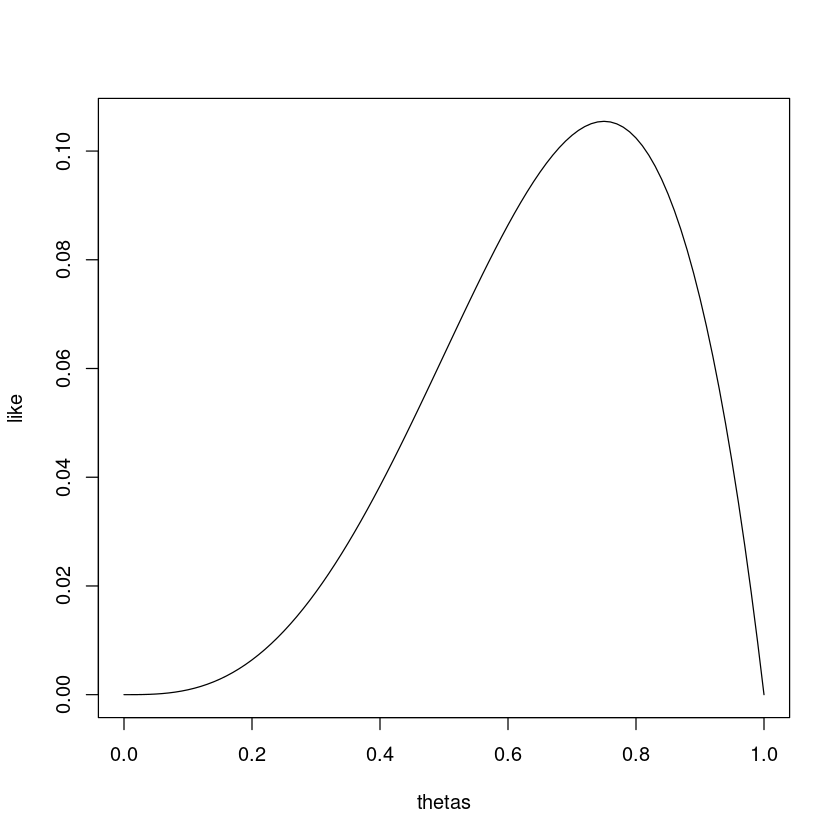

In [1]:
# observations: Monster Monster Fish Monster

thetas <- seq(0,1,0.01)

# likelihood
like <- c()
for (theta in thetas) like <- c(like, (theta^3)*(1-theta)^1)

plot(thetas,like, type="l")


In [2]:
# MLE
cat("estimate: ", thetas[which.max(like)])

estimate:  0.75

In [3]:
# LRT: H0: theta<=0.05; H1: theta>0.05
tD <- 2*log(max(like)/like[6])
tD
# p-value
1-pchisq(tD,1)


[1] 13.5783

[1] 0.0002288155

What do you conclude about the existence of Nessie using the likelihood approach?

Imagine that in the likelihood approach we use only one visual (or auditive) organ,
i.e. our eyes (or ears).
<img src="Images/EyeOnly.png" width="800" height="800" />

However, in real life, we take many decisions based not solely on what we observe but
also on some believes of ours (sometines unfortunately).

We usually use another organ, the brain, to make inferences on the probability of a particular
event to occur.
<img src="Images/EyeBrain.png" width="800" height="800" />

Note that in this cartoon the brain is "blind", in the sense that it does not observe the data
(no arrow pointing to the eye) but its inferences on the event are based on its own believes.

Back to the Loch Ness monster case, we can clearly have some believes whether or not Nessie
exists not only because I told you I saw it in the campus.
This "belief" expresses the probability of Nessie existing $p(N)$ unconditional of the data.

Our intuition is that the probability of Nessie existing is somehow a joint product of the likelihood (the eyes) and the belief (the brain).
Therefore, $p(N|D) \propto p(D|N)p(N)$.

How can we define $p(N)$?
This depends on our blind "belief" function.

point estimate: 0.67

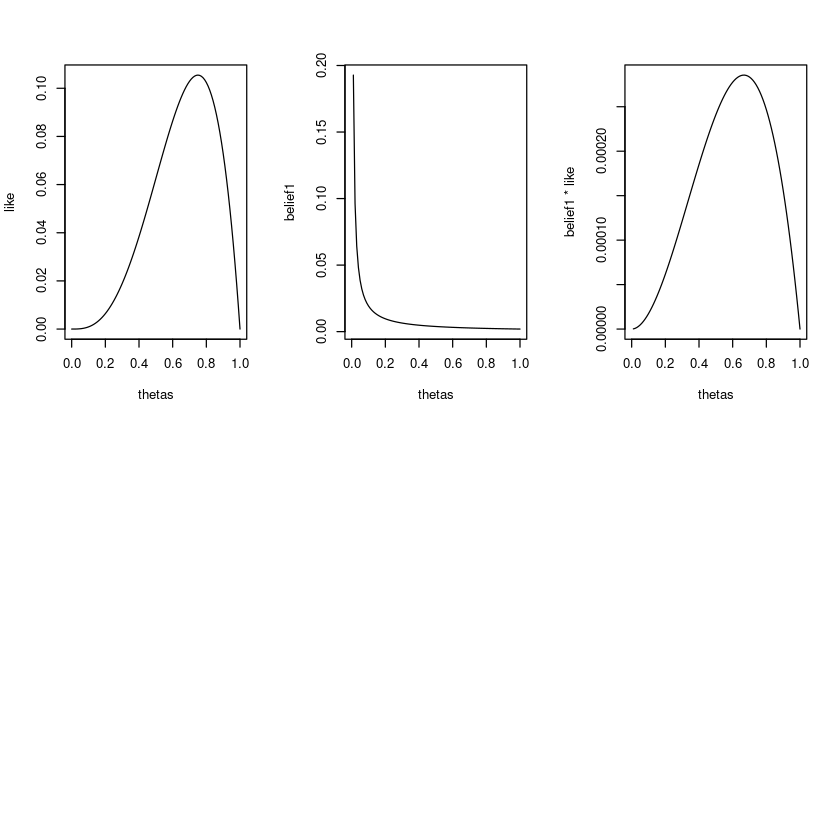

In [4]:
# skeptical belief function
belief1 <- 1/thetas
belief1[1] <- NA
belief1 <- belief1/sum(belief1, na.rm=T)

par(mfrow=c(2,3))
plot(thetas,like,type="l")
plot(thetas,belief1,type="l")
plot(thetas,belief1*like,type="l")
cat("point estimate:", thetas[which.max(belief1*like)])

point estimate: 0.01

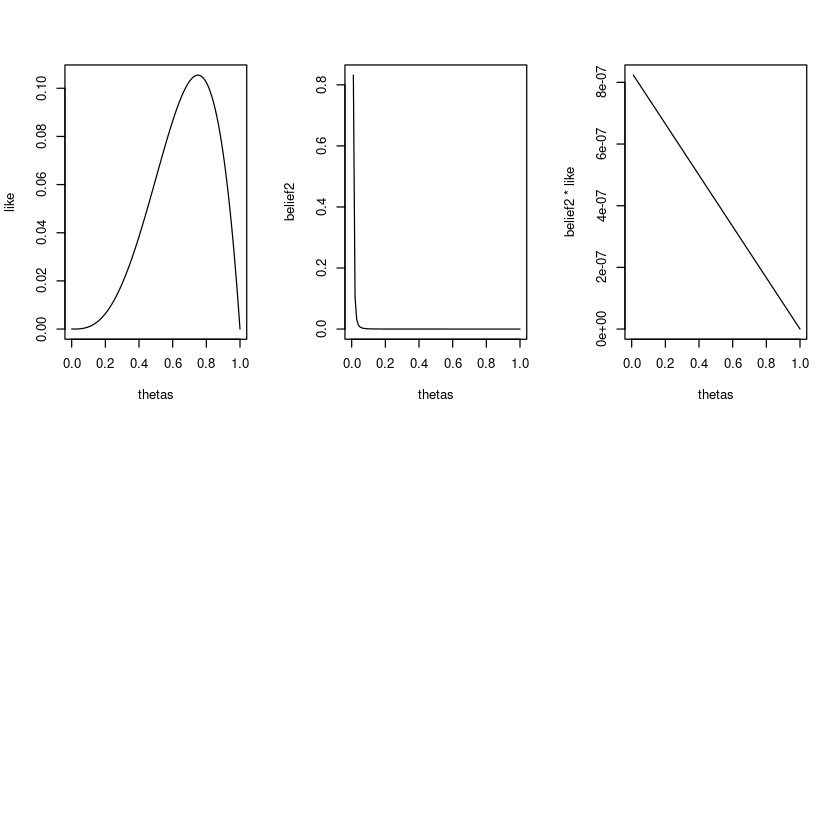

In [5]:
# very skeptical belief function
belief2 <- 1/thetas^3
belief2[1] <- NA
belief2 <- belief2/sum(belief2, na.rm=T)

par(mfrow=c(2,3))
plot(thetas,like,type="l")
plot(thetas,belief2,type="l")
plot(thetas,belief2*like,type="l")
cat("point estimate:", thetas[which.max(belief2*like)])

Note that these are not proper probabilities (we will see later how to calculate proper probabilities using "belief" functions).
We can deduct how the choice of a different "belief" function can point us to either different conclusions or confidence levels.

In statistics, the "belief" function (e.g. $p(N)$) is called _prior probability_ and
the joint product of the likelihood ($p(D|N)$) and the prior ($p(N)$) is proportional to
the _posterior probability_ ($p(N|D)$).

The use of posterior probabilities for inferences is called Bayesian statistics.

### What

Bayesian statistics is an alternative to classical frequentist approaches, where
maximum likelihood estimates (MLE) and hypothesis testing based on _p_-values
are often used.

However, there is no definite division between frequentists and Bayesians as, in
many modern applications, the approach taken is eclectic.

Imagine you have just submitted a manuscript for publication to a
peer-reviewed journal.
You want to assess its probability of being accepted and published.

<center><img src="Images/journals.png" width="400" height="400" /><center>

This assessment may use, for instance, the information regarding the journal's acceptance rate, the quality of the study and its relevance to the journal's scope.

Your manuscript is accepted. What is the probability that your next manuscript will be accepted?

You had one success over one trial. Therefore, the probability is 100%.
However, it looks clear that this estimate is somehow "wrong" as it is based on a small sample size and we know that the acceptance rate is anyway smaller than 100%.

You can think of the journal's acceptance rate (e.g. 20%) as our prior information.
You are then tempted to set a probability of being accepted smaller than 100%.
By doing so you are behaving as a Bayesian statistician, as you are adjusting the
direct estimate in light of a prior information.
Bayesian statistics have the ability to incorporate prior information into an analysis.

Suppose you are conducting an experiment of measuring the biodiversity
of some species on particular rock shores in Scotland.
Specifically, you are collecting the number of different species of algae in 4 different locations across time, over 3 years.
Unfortunately, something happened in 2016 for Location B and you do not have data reported.


| Year | Loc. A | Loc. B | Loc. C | Loc. D |
| ---- | ------ | ------ | ------ | ------ |
| 2015 | 45     |   54   | 47     |   52   |
| 2016 | 41     | n.a.   | 43     | 45     |
| 2017 | 32     | 38     | 37     | 35     |


What is a reasonable value for the missing entry? How about 100?

Perhaps 100 is too high since the numbers surrounding the entry may point towards a value of around 45.
We could fit a model or take an average to impute the missing data.

Now assume that you have access to some data for Location B in 2016.
Specifically, you have partial data where you could retrieve biodiversity levels only for a fifth $(1/5)$  of Location B for 2016.
You extrapolate such partial value to obtain an estimate which turns out to be 100.
Are you willing now to impute missing data with 100, extrapolated from some partial coverage, while before you thought this number was much higher than expected?

A more intuitive solution would be to take a sort of weighted average between this direct
(but uncertain) measurement (100) and the indirect estimate you used (45, the average of surrouding cells)
when there was no information available.

Finally, imagine that you can retrieve biodiversity values for half $(1/2)$ of Location B in 2016.
If so, then you would like to "weight" more such observation than to the previous case where only
a fifth of the area was available.

Bayesian statistics formalises such integration between direct and indirect information.

* The _frequentist_ is based on imagining repeated sampling from a particular
 model, which defines the probability of the observed data conditional on unknown parameters.
* The _likelihoodist_ uses the sampling model as the frequentists but all
 inferences are based on the observed data only.
* The _Bayesian_ requires a sampling model (the likelihood) and a prior distribution
  on all unknown parameters. The prior and the likelihood are used to compute the
  conditional distribution of the unknown parameters given the observed data.

* The _Empirical Bayesian_ (EB) allows the observed data to contribute to
  defining the prior distribution.
<img src="Images/EyeBrainEB.png" width="800" height="800" />

To put it in a different perspective, assuming $D$ is the data and $\theta$ is your unknown parameter,
the frequentist approach conditions on parameters and integrates over the data, $p(D|\theta)$.

On the other hand, the Bayesian approach conditions on the data and integrates over the
parameters, $p(\theta|D)$.

Therefore, in Bayesian statistics we derive proper probability distributions of our parameters
of interest, rather than deriving a point estimate.
In other words, in Bayesian statistics a probability is assigned to a hypothesis, while under a frequentist inference, a hypothesis is tested without being assigned to a probability of occurring.

Unlike likelihoodist, Bayesian inferences can "accept" the null hypothesis rather
than "fail to reject" it.
Bayesian procedures can also impose parsimony in model choice and avoid further
testing for multiple comparisons.

### Why

Bayesian methods for data analysis are used because:
* of the increased computing power over the last years;
* they have good frequentist properties;
* their answers are more easily interpretable by non-specialists;
* they are already implemented in software packages.


Bayesian statistics is used in many topics in life sciences, such as genetics (e.g. fine-mapping of disease-susceptibility genes), ecology (e.g. agent-based models), evolution (e.g. inference of phylogenetic trees), bioinformatics (e.g. base calling).